In [2]:
import numpy as np
from scipy.sparse import diags
from scipy import signal
from scipy import stats
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import time
import matplotlib.animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['animation.embed_limit'] = 2**128



from workhorse import *
from ploting import *

In [41]:
e = 1.602176634e-19
hbar = 1.054571817e-34
m = 9.1093837015e-31
sigmaX = 200e-10
centerX = 35e-8
L = 3000e-9
vMax = 90e-3 * e
scaleTime = 0.04
bigT = 3/4
Nsteps = 10001
krampus = 1.0



dbTDParameters = {
    "center": 1500e-9,
    "vMax": vMax,
    "barrierWidth": 1.6e-9,
    "wellWidth": 6e-9,
    "potentialVar": 15e-3 * e,
    "phaseLeft": 0,
    "phaseRight": 0
}

dbTDParameters["begining"] = dbTDParameters["center"] - (0.5*dbTDParameters["wellWidth"] + dbTDParameters["barrierWidth"])
dbTDParameters["end"] = dbTDParameters["center"] + (0.5*dbTDParameters["wellWidth"] + dbTDParameters["barrierWidth"])


In [25]:
def freqDiff(initialEnergy, freq1, freq2):
    initialValues = [e, hbar, m, initialEnergy, sigmaX, centerX, L, vMax, scaleTime, bigT, Nsteps, krampus]

    dbTDParameters["freqRight"] = freq2/hbar
    dbTDParameters["freqLeft"] = freq1/hbar

    dbTDWaveL = tdWavePropagation(initializePsi, dbTD, initialValues, dbTDParameters, 3000)


    dbTDParameters["freqRight"] = freq1/hbar
    dbTDParameters["freqLeft"] = freq2/hbar

    dbTDWaveR = tdWavePropagation(initializePsi, dbTD, initialValues, dbTDParameters, 3000)

    freqL, refAmpL, transAmpL = fourierTransform(dbTDWaveL, initialValues, -1, dbTDParameters)
    freqR, refAmpR, transAmpR = fourierTransform(dbTDWaveR, initialValues, -1, dbTDParameters)

    left = [freqL, refAmpL, transAmpL]
    right = [freqR, refAmpR, transAmpR]


    return left, right


def frequencyDifference(leftTop, rightTop, leftBot, rightBot, frequency1, frequency2, frequency3, frequency4, lims = [20e-3, 40e-3, -0, 1.4], figsizeInput = [12, 12]):
    e = 1.602176634e-19
    hbar = 1.054571817e-34
    m = 9.1093837015e-31

    freqLow = leftTop[0]
    freqHigh = leftBot[0]


    energySpecLow = ( (freqLow)* hbar)**2/(2 * m)*1e3
    energySpecHigh = ( (freqHigh)* hbar)**2/(2 * m)*1e3


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize = (figsizeInput[0], figsizeInput[1]))
    fig.suptitle(f"Energy spectra for opposite frequencies, i.e. $\omega_L$ = -$\omega_R$. Initial energy $E_{0}$ = {initEnergy*(1e3/e):.1f} meV.")
    # fig.suptitle(f"Energy spectra for different frequency differences. Initial energy $E_{0}$ = {initEnergy*(1e3/e):.1f} meV.")
    plt.xlim(lims[0], lims[1])
    plt.ylim(lims[2], lims[3])




    ax1.plot(energySpecLow/e, leftTop[1]*1e-11, label = "Reflected")
    ax1.plot(energySpecLow/e, leftTop[2]*1e-11, label = "Transmited")


    ax2.plot(energySpecLow/e, rightTop[1]*1e-11, label = "Reflected")
    ax2.plot(energySpecLow/e, rightTop[2]*1e-11, label = "Transmited")

    ax3.plot(energySpecHigh/e, leftBot[1]*1e-11, label = "Reflected")
    ax3.plot(energySpecHigh/e, leftBot[2]*1e-11, label = "Transmited")

    ax4.plot(energySpecHigh/e, rightBot[1]*1e-11, label = "Reflected")
    ax4.plot(energySpecHigh/e, rightBot[2]*1e-11, label = "Transmited")



    xPos = 24.06
    yPos = 0.75

    ax1.text(xPos, yPos, "(a)", fontsize='xx-large')
    ax2.text(xPos, yPos, "(b)", fontsize='xx-large')
    ax3.text(xPos, yPos, "(c)", fontsize='xx-large')
    ax4.text(xPos, yPos, "(d)", fontsize='xx-large')
    
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    ax3.legend(loc = 'upper right')
    ax4.legend(loc = 'upper right')

    ax1.set_title(f"$\omega_L$ = {frequency1*(1e3/e):.1f}, $\omega_R$ = {frequency2*(1e3/e):.1f}")
    ax2.set_title(f"$\omega_L$ = {frequency2*(1e3/e):.1f}, $\omega_R$ = {frequency1*(1e3/e):.1f}")
    ax3.set_title(f"$\omega_L$ = {frequency3*(1e3/e):.1f}, $\omega_R$ = {frequency4*(1e3/e):.1f}")
    ax4.set_title(f"$\omega_L$ = {frequency4*(1e3/e):.1f}, $\omega_R$ = {frequency3*(1e3/e):.1f}")


    ax1.grid(which = 'both')
    ax2.grid(which = 'both')
    ax3.grid(which = 'both')
    ax4.grid(which = 'both')

    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.yaxis.set_minor_locator(MultipleLocator(0.1))

    ax3.set_xlabel("Energy [meV]")
    ax4.set_xlabel("Energy [meV]")

    ax1.set_ylabel("Intensity [Arb. Units]")
    ax3.set_ylabel("Intensity [Arb. Units]")

In [22]:
# done

freq1 = 1.5e-3 * e # done
freq2 = 2.5e-3 * e # done
freq3 = 3.5e-3 * e 

initEnergy = 26.037e-3 * e

In [23]:
lowDiffLeft, lowDiffRight = freqDiff(initEnergy, freq1, freq2)
highDiffLeft, highDiffRight = freqDiff(initEnergy, freq1, freq3)

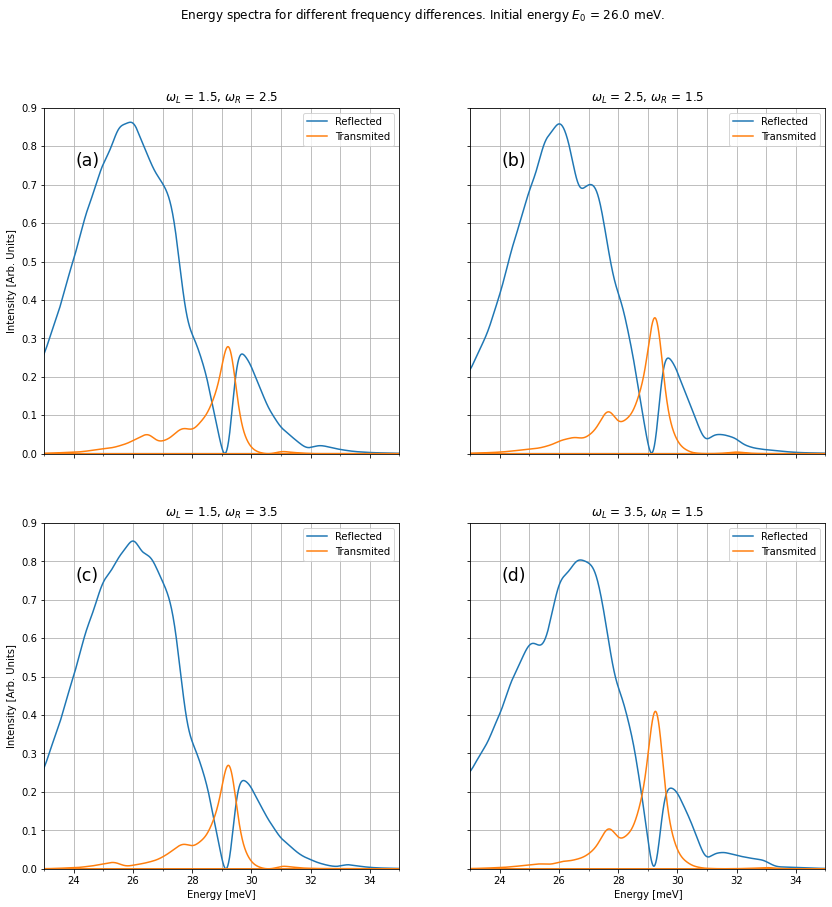

In [24]:
limits = [23, 35, 0, 0.9]
figSize = [14, 14]
frequencyDifference(lowDiffLeft, lowDiffRight, highDiffLeft, highDiffRight, freq1, freq2, freq1, freq3, lims = limits, figsizeInput = figSize)

In [29]:
freq1 = 1.5e-3 * e
negativeFreq1 = -1.5e-3 * e
freq2 = 2.0e-3 * e
negativeFreq2 = -2.0e-3 * e

initEnergy = 27.537e-3 * e

In [30]:
lowDiffLeftNeg, lowDiffRightNeg = freqDiff(initEnergy, freq1, negativeFreq1)
highDiffLeftNeg, highDiffRightNeg = freqDiff(initEnergy, freq2, negativeFreq2)

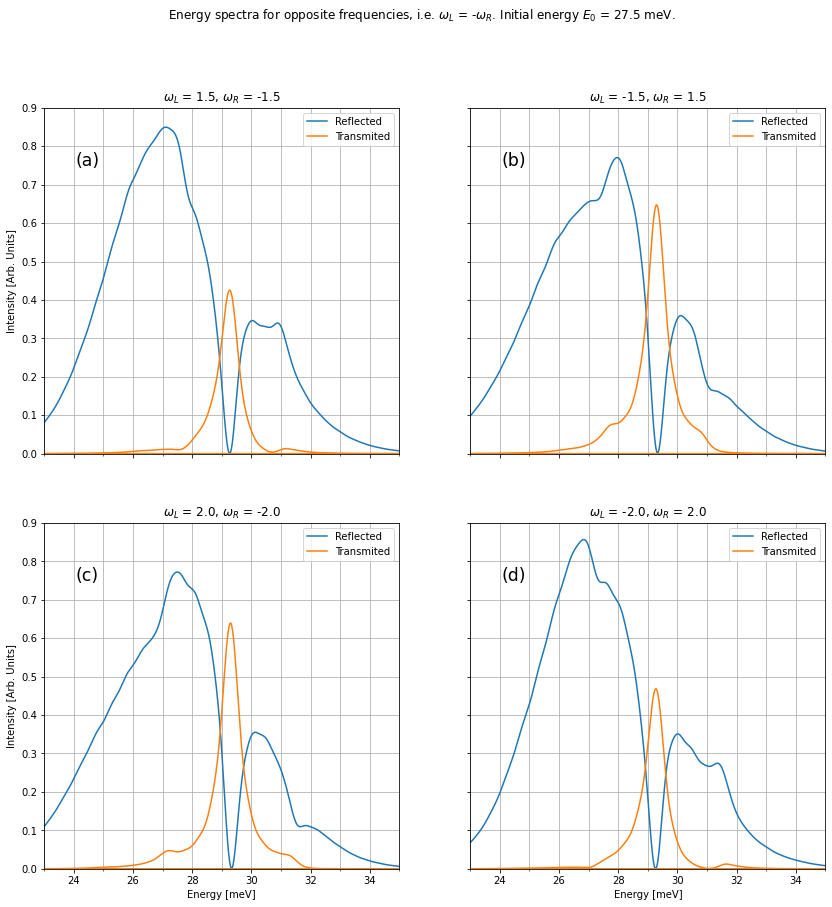

In [31]:
limits = [23, 35, 0, 0.9]
figSize = [14, 14]
frequencyDifference(lowDiffLeftNeg, lowDiffRightNeg, highDiffLeftNeg, highDiffRightNeg, freq1, negativeFreq1, freq2, negativeFreq2, lims = limits, figsizeInput = figSize)

"""









"""

In [32]:
def singleOscillations(initialEnergy, resonantEnergy):


    initialValues = [e, hbar, m, initialEnergy, sigmaX, centerX, L, vMax, scaleTime, bigT, Nsteps, krampus]

    dbTDParameters["freqRight"] = 0
    dbTDParameters["freqLeft"] = (resonantEnergy-initialEnergy)/hbar

    dbTDWaveL = tdWavePropagation(initializePsi, dbTD, initialValues, dbTDParameters, 3000)

    dbTDParameters["freqRight"] = (resonantEnergy-initialEnergy)/hbar
    dbTDParameters["freqLeft"] = 0

    dbTDWaveR = tdWavePropagation(initializePsi, dbTD, initialValues, dbTDParameters, 3000)



    freqL, refAmpL, transAmpL = fourierTransform(dbTDWaveL, initialValues, -1, dbTDParameters)
    freqR, refAmpR, transAmpR = fourierTransform(dbTDWaveR, initialValues, -1, dbTDParameters)


    left = [freqL, refAmpL, transAmpL]
    right = [freqR, refAmpR, transAmpR]


    return left, right

In [55]:
eDiffLow = 1.5e-3 * e
eDiffMid = 2.5e-3 * e
eDiffHigh = 3.5e-3 * e

resonantE = 29.5e-3*e

initELow = resonantE - eDiffLow
initEMid = resonantE - eDiffMid
initEHigh = resonantE - eDiffHigh

In [56]:
lowLeft, lowRight = singleOscillations(initELow, resonantE)
lowVec = [lowLeft, lowRight]

In [57]:
midLeft, midRight = singleOscillations(initEMid, resonantE)
midVec = [midLeft, midRight]

In [58]:
highLeft, highRight = singleOscillations(initEHigh, resonantE)
highVec = [highLeft, highRight]

In [59]:
def singlePrint(lowVec, midVec, highVec, limits = [20e-3, 40e-3, -0, 1.4], figsizeInput = [12, 18]):

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True, figsize = figsizeInput)

    freqLow = lowVec[0][0]
    freqMid = midVec[0][0]
    freqHigh = highVec[0][0]

    energySpecLow = ( (freqLow)* hbar)**2/(2 * m)*1e3
    energySpecMid = ( (freqMid)* hbar)**2/(2 * m)*1e3
    energySpecHigh = ( (freqHigh)* hbar)**2/(2 * m)*1e3


    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

    ax1.plot(energySpecLow/e, lowVec[0][1]*1e-10, label='Reflected')
    ax1.plot(energySpecLow/e, lowVec[0][2]*1e-10, label='Transmitted')

    ax2.plot(energySpecLow/e, lowVec[1][1]*1e-10, label='Reflected')
    ax2.plot(energySpecLow/e, lowVec[1][2]*1e-10, label='Transmitted')


    ax3.plot(energySpecMid/e, midVec[0][1]*1e-10, label='Reflected')
    ax3.plot(energySpecMid/e, midVec[0][2]*1e-10, label='Transmitted')

    ax4.plot(energySpecMid/e, midVec[1][1]*1e-10, label='Reflected')
    ax4.plot(energySpecMid/e, midVec[1][2]*1e-10, label='Transmitted')


    ax5.plot(energySpecHigh/e, highVec[0][1]*1e-10, label='Reflected')
    ax5.plot(energySpecHigh/e, highVec[0][2]*1e-10, label='Transmitted')

    ax6.plot(energySpecHigh/e, highVec[1][1]*1e-10, label='Reflected')
    ax6.plot(energySpecHigh/e, highVec[1][2]*1e-10, label='Transmitted')


    fig.suptitle(f"Energy spectra for one oscillating and one stationary barrier, at different modulations $\hbar\omega$.")

    ax1.set_title(f"Left barrier oscillating. $E_{0}$ = {initELow*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initELow)*(1e3/e):.1f} meV")
    ax2.set_title(f"Right barrier oscillating. $E_{0}$ = {initELow*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initELow)*(1e3/e):.1f} meV")
    ax3.set_title(f"Left barrier oscillating. $E_{0}$ = {initEMid*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initEMid)*(1e3/e):.1f} meV")
    ax4.set_title(f"Right barrier oscillating. $E_{0}$ = {initEMid*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initEMid)*(1e3/e):.1f} meV")
    ax5.set_title(f"Left barrier oscillating. $E_{0}$ = {initEHigh*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initEHigh)*(1e3/e):.1f} meV")
    ax6.set_title(f"Right barrier oscillating. $E_{0}$ = {initEHigh*(1e3/e):.1f} meV. $\hbar\omega$ ={(resonantE-initEHigh)*(1e3/e):.1f} meV")

    ax5.set_xlabel("Energy [meV]")
    ax6.set_xlabel("Energy [meV]")

    ax1.set_ylabel("Intensity [Arb. Units]")
    ax3.set_ylabel("Intensity [Arb. Units]")
    ax5.set_ylabel("Intensity [Arb. Units]")

    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.yaxis.set_minor_locator(MultipleLocator(1))

    xPos = 24.06
    yPos = 7.4

    ax1.text(xPos, yPos, "(a)", fontsize='xx-large')
    ax2.text(xPos, yPos, "(b)", fontsize='xx-large')
    ax3.text(xPos, yPos, "(c)", fontsize='xx-large')
    ax4.text(xPos, yPos, "(d)", fontsize='xx-large')
    ax5.text(xPos, yPos, "(e)", fontsize='xx-large')
    ax6.text(xPos, yPos, "(f)", fontsize='xx-large')

    ax1.grid(which = 'both')
    ax2.grid(which = 'both')
    ax3.grid(which = 'both')
    ax4.grid(which = 'both')
    ax5.grid(which = 'both')
    ax6.grid(which = 'both')

    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    ax3.legend(loc = 'upper right')
    ax4.legend(loc = 'upper right')
    ax5.legend(loc = 'upper right')
    ax6.legend(loc = 'upper right')

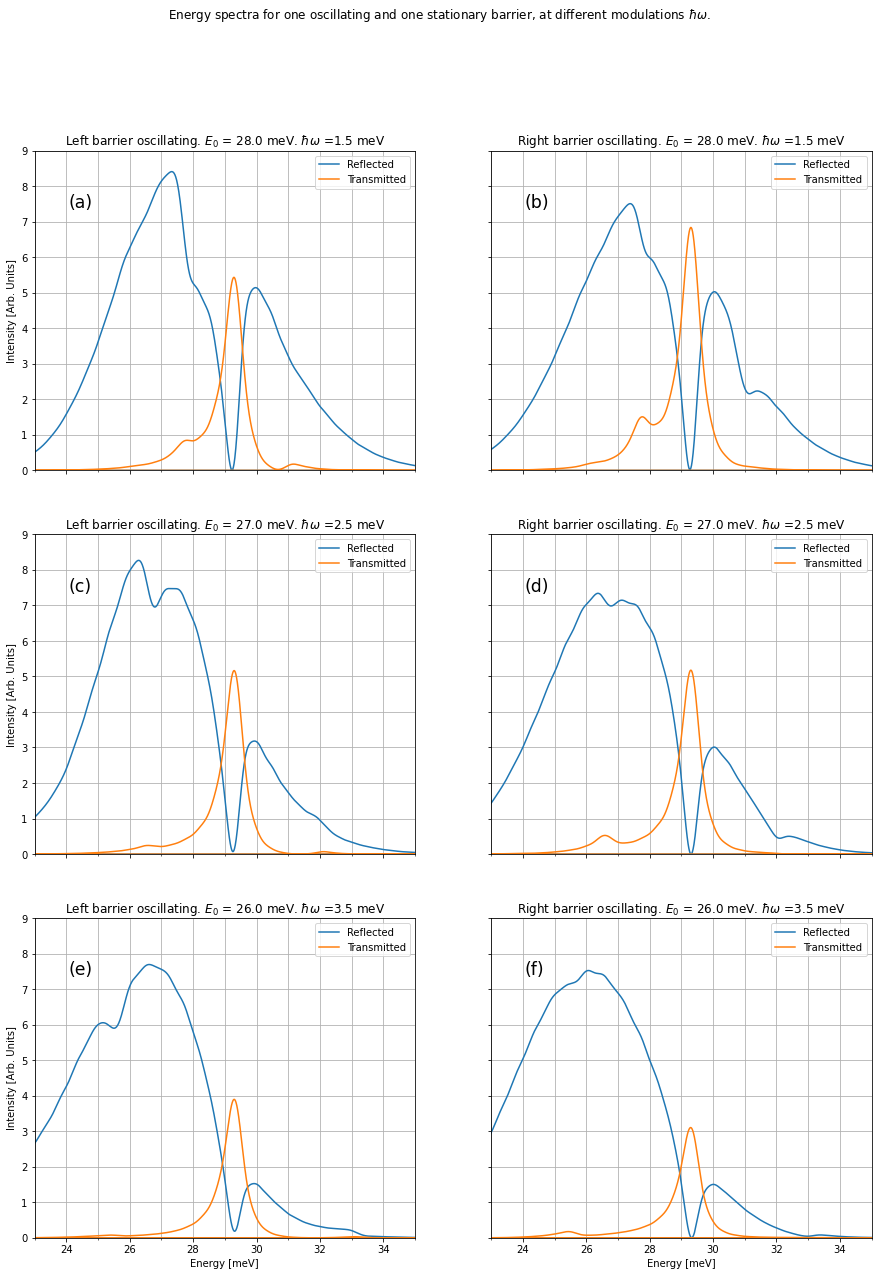

In [60]:
singlePrint(lowVec, midVec, highVec, limits=[23, 35, 0, 9], figsizeInput=[15, 20])